## **주가(time series data) 예측**
- **내일 삼성전자의 주가를 각 자 예측해보자**

In [1]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data
start_date = '2021-01-01'
end_date = '2024-5-31'

# Fetch the data using yfinance
aapl = yf.download('AAPL', start=start_date, end=end_date)
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002083,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572327,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484024,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592972,105158200
...,...,...,...,...,...,...
2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


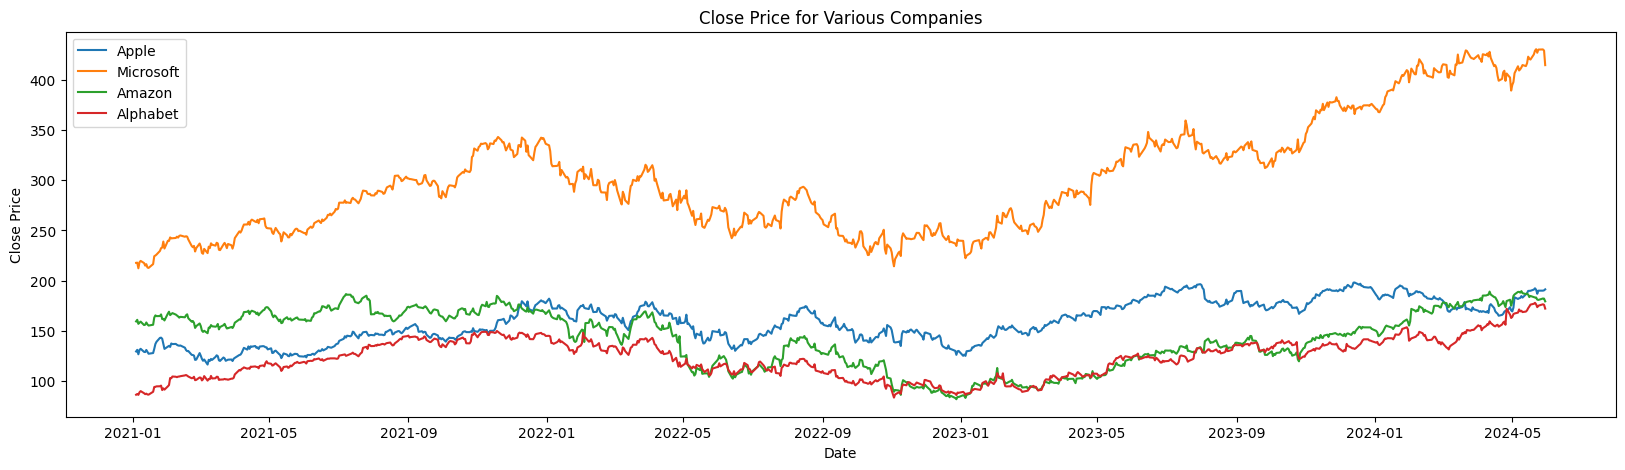

In [2]:
# prompt: 어떤 다른 회사가 있는지 확인하고 사전형으로 저장

tickers = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    # 'Tesla': 'TSLA',
    # 'Berkshire Hathaway': 'BRKA',
    # 'JPMorgan Chase': 'JPM',
    # 'Johnson & Johnson': 'JNJ',
    # 'ExxonMobil': 'XOM',
    # 'Walmart': 'WMT',
}

# prompt: 회사명을 key로 하고 시계열자료를 데이터프레임으로 저장하는 사전형 자료를 만드는 코드를

company_data = {}
for company_name, ticker_symbol in tickers.items():
  company_data[company_name] = yf.download(ticker_symbol, start=start_date, end=end_date)

# prompt: 각 회사의 Close변수를 시각화 15, 4 사이즈로

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))

for company_name, data in company_data.items():
  ax.plot(data['Close'], label=company_name)

plt.title('Close Price for Various Companies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## **이동평균법(Moving Average Method)**

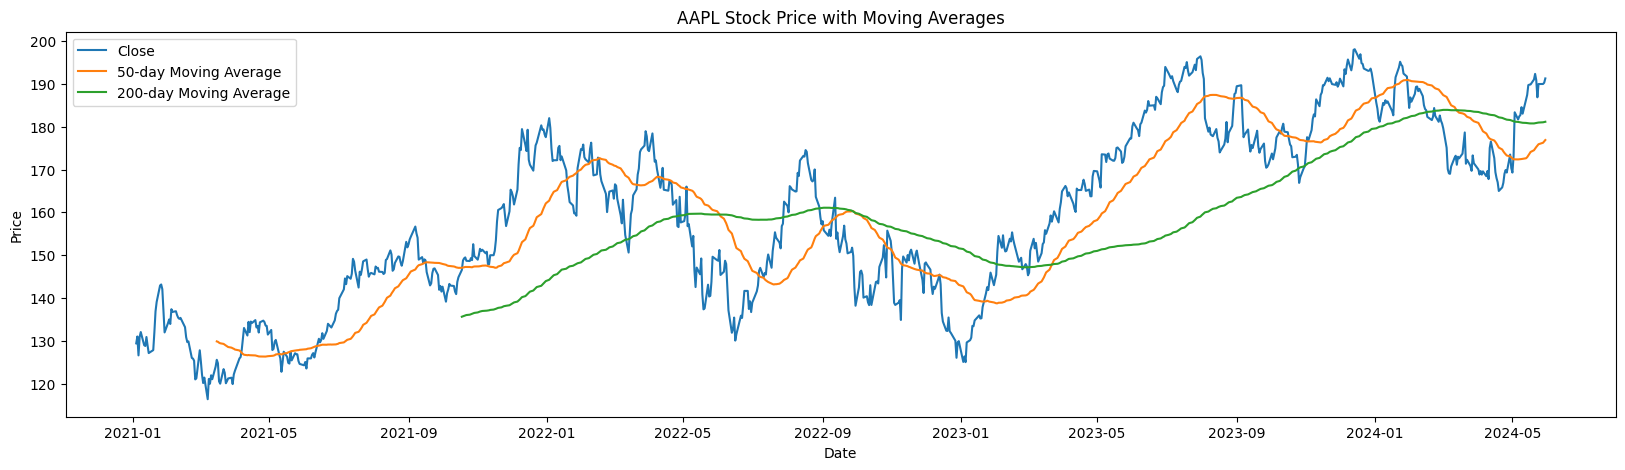

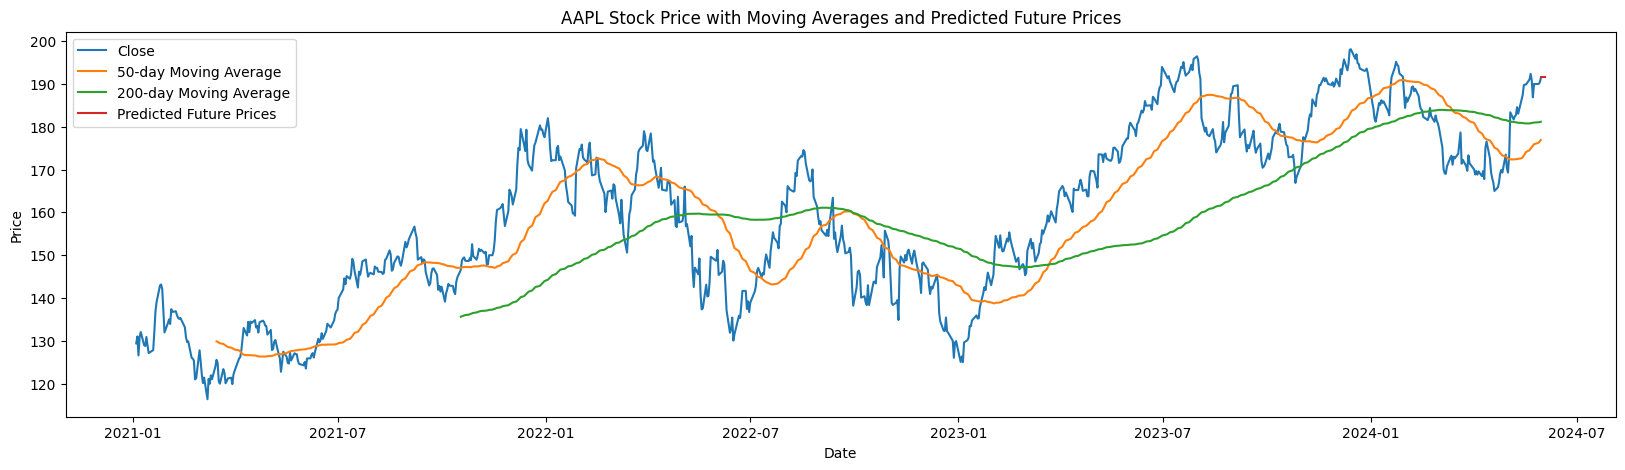

In [3]:
# prompt: 이동평균법으로 AAPL주가를 예측해다오

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the moving average of the closing prices
aapl['ma50'] = aapl['Close'].rolling(window=50).mean()
aapl['ma200'] = aapl['Close'].rolling(window=200).mean()

# Plot the closing prices, 50-day moving average, and 200-day moving average
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(aapl['Close'], label='Close')
ax.plot(aapl['ma50'], label='50-day Moving Average')
ax.plot(aapl['ma200'], label='200-day Moving Average')

plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Use the moving averages to predict future prices
future_dates = pd.date_range(start=aapl.index[-1], periods=5, freq='D')
aapl_future = pd.DataFrame(index=future_dates, columns=['Close'])

for date in future_dates:
  aapl_future.loc[date] = aapl['Close'].iloc[-1] * (aapl['ma50'].iloc[-1] / aapl['ma50'].iloc[-2])

# Plot the predicted future prices
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(aapl['Close'], label='Close')
ax.plot(aapl['ma50'], label='50-day Moving Average')
ax.plot(aapl['ma200'], label='200-day Moving Average')
ax.plot(aapl_future['Close'], label='Predicted Future Prices')

plt.title('AAPL Stock Price with Moving Averages and Predicted Future Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## **지수평활법**

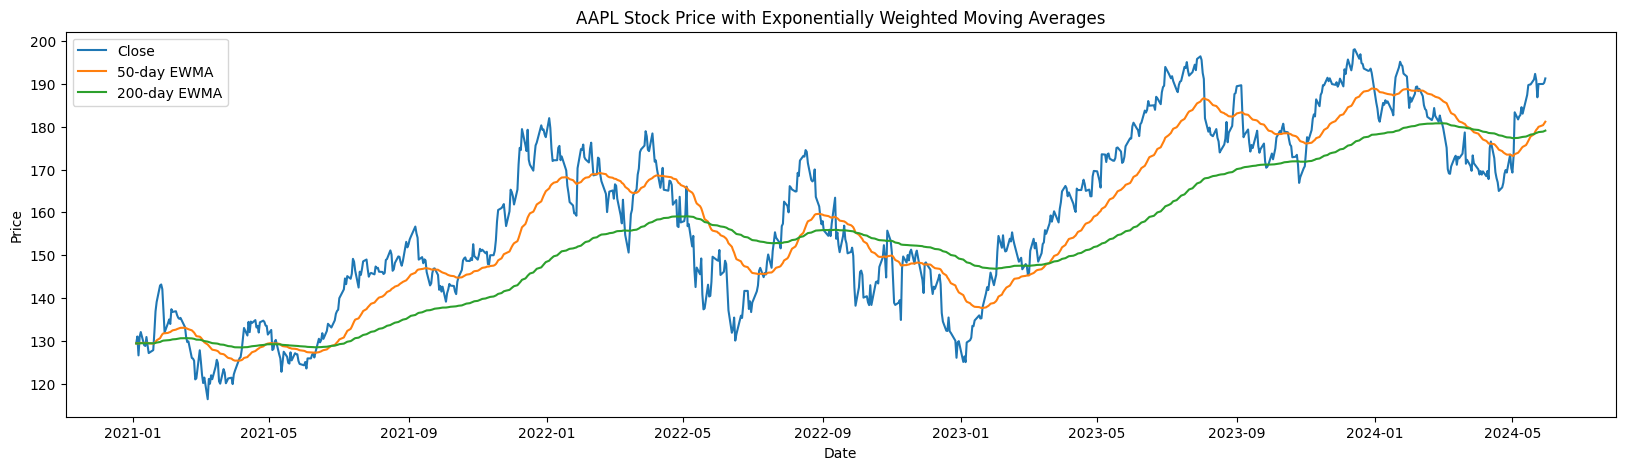

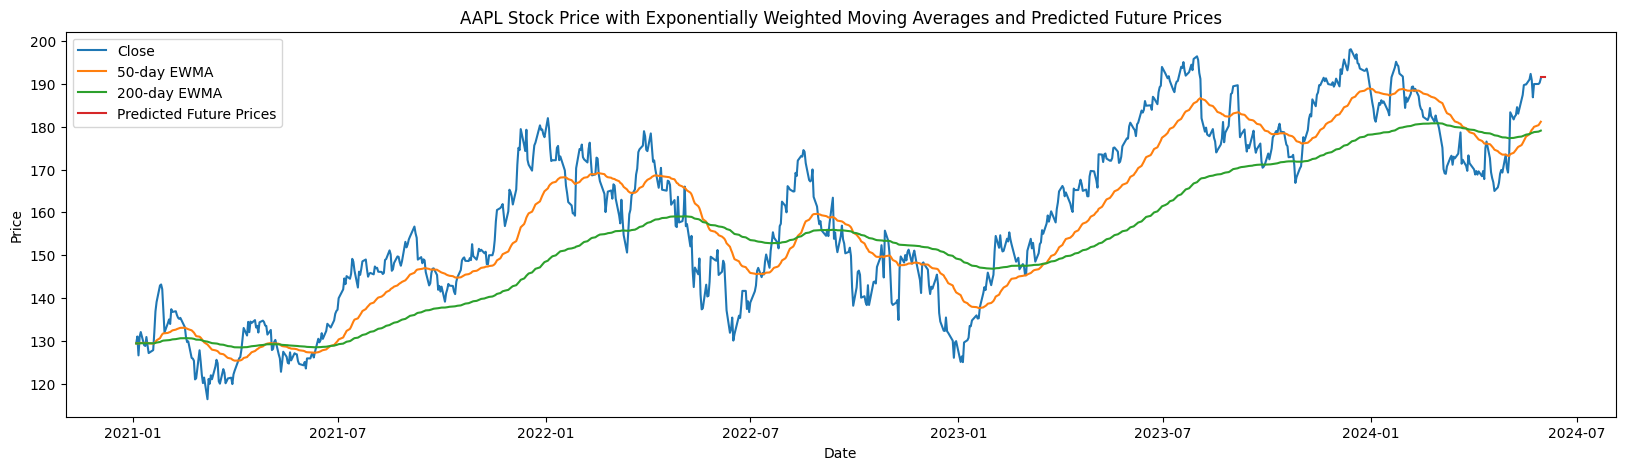

In [4]:
# prompt: 지수평활법으로 예측

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the exponentially weighted moving average (EWMA) of the closing prices
aapl['ewma50'] = aapl['Close'].ewm(span=50, adjust=False).mean()
aapl['ewma200'] = aapl['Close'].ewm(span=200, adjust=False).mean()

# Plot the closing prices, 50-day EWMA, and 200-day EWMA
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(aapl['Close'], label='Close')
ax.plot(aapl['ewma50'], label='50-day EWMA')
ax.plot(aapl['ewma200'], label='200-day EWMA')

plt.title('AAPL Stock Price with Exponentially Weighted Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Use the EWMA to predict future prices
future_dates = pd.date_range(start=aapl.index[-1], periods=5, freq='D')
aapl_future = pd.DataFrame(index=future_dates, columns=['Close'])

for date in future_dates:
  aapl_future.loc[date] = aapl['Close'].iloc[-1] * (aapl['ewma50'].iloc[-1] / aapl['ewma50'].iloc[-2])

# Plot the predicted future prices
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(aapl['Close'], label='Close')
ax.plot(aapl['ewma50'], label='50-day EWMA')
ax.plot(aapl['ewma200'], label='200-day EWMA')
ax.plot(aapl_future['Close'], label='Predicted Future Prices')

plt.title('AAPL Stock Price with Exponentially Weighted Moving Averages and Predicted Future Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


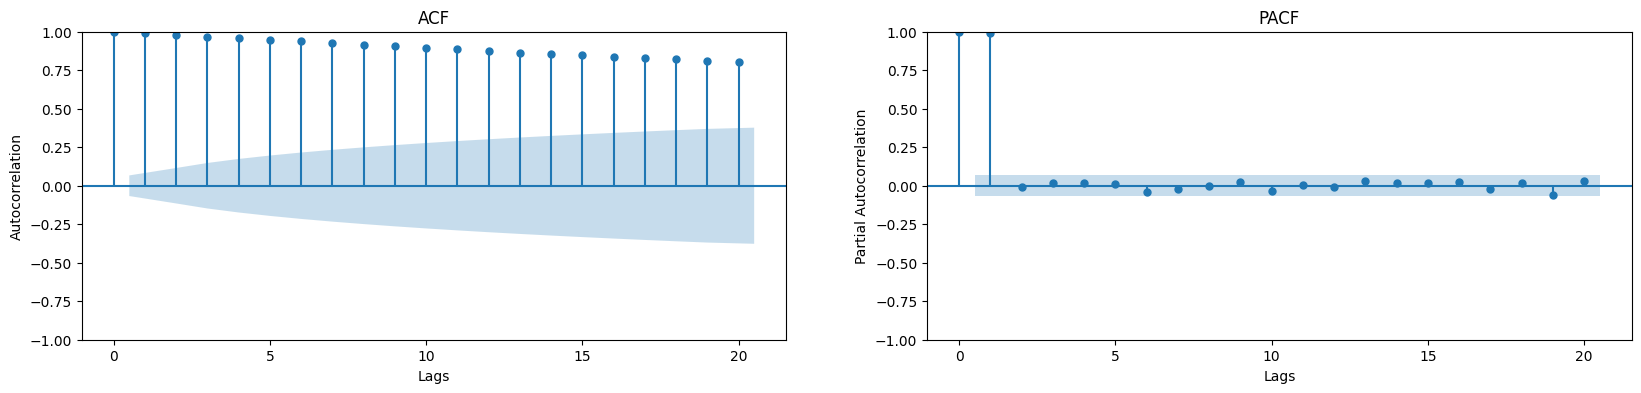

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시각화 - ACF와 PACF
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plot_acf(aapl['Close'], lags=20, ax=plt.gca())
plt.title('ACF')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

plt.subplot(1, 2, 2)
plot_pacf(aapl['Close'], lags=20, ax=plt.gca())
plt.title('PACF')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()